In [ ]:
"""
This code was adapted from Brouwer (2020) [github.com/hbrouwer/rerps].
"""

In [54]:
import sys
import pandas as pd
import rerps.models
import rerps.plots
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
def time_window_averages(ds, start, end):
    ts_idx = ds.descriptors["Time"]
    sds = ds.copy()
    sds.array = sds.array[(sds.array[:,ts_idx] >= start) & (sds.array[:,ts_idx] < end),:] # end-exclusive
    # sds.array = sds.array[(sds.array[:,ts_idx] >= start) & (sds.array[:,ts_idx] <= end),:] # end-inclusive
    sds_summary = rerps.models.DataSummary(sds, ["Condition", "Subject"])

    nrows = sds_summary.means.shape[0] * len(sds_summary.electrodes)
    sds_lf = np.empty((nrows, 4), dtype=object)

    sds_idx = 0
    for idx in range(0, sds_summary.means.shape[0]):
        c = sds_summary.means[idx, sds_summary.descriptors["Condition"]]
        s = sds_summary.means[idx, sds_summary.descriptors["Subject"]]
        for e, i in sds_summary.electrodes.items():
            sds_lf[sds_idx,:] = [c, s, e, sds_summary.means[idx,i]]
            sds_idx = sds_idx + 1

    return pd.DataFrame(sds_lf, columns=["cond", "subject", "ch", "eeg"])

# Create DataSet-s

## Local depencies

In [5]:
# read the .csv and assign it to df variable
os.chdir( '/home/bkapusi' )

# read the .csv
df = pd.read_csv( 'data/storage_barni/finalData/lt_sd_shift.csv', index_col=False )
os.chdir( 'SYMUL' )

# Compare correct with only language incorrect
df_sd_lan = df[(df['Condition']=='FCC')|(df['Condition']=='FIC')]

# Compare correct with only music incorrect
df_sd_mus = df[(df['Condition']=='FCC')|(df['Condition']=='FCI')]

# Compare correct with both language and music incorrect
df_sd_dub = df[(df['Condition']=='FCC')|(df['Condition']=='FII')]

In [6]:
# Create DataSet object language violation
obs_data_sd_lan = rerps.models.DataSet(
    data    = df_sd_lan,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_sd_lan.array[:,obs_data_sd_lan.descriptors["Time"]] = obs_data_sd_lan.array[:,obs_data_sd_lan.descriptors["Time"]] * 1000

# z-standardization
obs_data_sd_lan.zscore_predictor("MelodyRating")
# obs_data_lan.zscore_predictor("meanSentRating")

# inversion (more means better 'sounding')
obs_data_sd_lan.array[:,obs_data_sd_lan.predictors["MelodyRating"]] *= -1
# obs_data_lan.array[:,obs_data_lan.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.58 seconds.


In [7]:
# Create DataSet object for music violation
obs_data_sd_mus = rerps.models.DataSet(
    data    = df_sd_mus,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_sd_mus.array[:,obs_data_sd_mus.descriptors["Time"]] = obs_data_sd_mus.array[:,obs_data_sd_mus.descriptors["Time"]] * 1000

# z-standardization
obs_data_sd_mus.zscore_predictor("MelodyRating")
# obs_data_mus.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data_sd_mus.array[:,obs_data_sd_mus.predictors["MelodyRating"]] *= -1
# obs_data_sd_mus.array[:,obs_data_sd_mus.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.54 seconds.


In [8]:
# Create DataSet object for double violation
obs_data_sd_dub = rerps.models.DataSet(
    data    = df_sd_dub,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_sd_dub.array[:,obs_data_sd_dub.descriptors["Time"]] = obs_data_sd_dub.array[:,obs_data_sd_dub.descriptors["Time"]] * 1000

# z-standardization
obs_data_sd_dub.zscore_predictor("MelodyRating")
# obs_data_sd_dub.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data_sd_dub.array[:,obs_data_sd_dub.predictors["MelodyRating"]] *= -1
# obs_data_sd_dub.array[:,obs_data_sd_dub.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.55 seconds.


## Long-distance dependencies

In [3]:
# read the .csv and assign it to df variable
os.chdir( '/home/bkapusi' )

# read the .csv
df = pd.read_csv( 'data/storage_barni/finalData/lt_ld_shift.csv', index_col=False )
os.chdir( 'SYMUL' )

# Compare correct with only language incorrect
df_ld_lan = df[(df['Condition']=='ECC')|(df['Condition']=='EIC')]

# Compare correct with only music incorrect
df_ld_mus = df[(df['Condition']=='ECC')|(df['Condition']=='ECI')]

# Compare correct with both language and music incorrect
df_ld_dub = df[(df['Condition']=='ECC')|(df['Condition']=='EII')]

In [43]:
# Create DataSet object language violation
obs_data_ld_lan = rerps.models.DataSet(
    data    = df_ld_lan,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_ld_lan.array[:,obs_data_ld_lan.descriptors["Time"]] = obs_data_ld_lan.array[:,obs_data_ld_lan.descriptors["Time"]] * 1000

# z-standardization
obs_data_ld_lan.zscore_predictor("MelodyRating")
# obs_data_ld_lan.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data_ld_lan.array[:,obs_data_ld_lan.predictors["MelodyRating"]] *= -1
# obs_data_ld_lan.array[:,obs_data_lan.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.57 seconds.


In [49]:
# Create DataSet object music violation
obs_data_ld_mus = rerps.models.DataSet(
    data    = df_ld_mus,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_ld_mus.array[:,obs_data_ld_mus.descriptors["Time"]] = obs_data_ld_mus.array[:,obs_data_ld_mus.descriptors["Time"]] * 1000

# z-standardization
obs_data_ld_mus.zscore_predictor("MelodyRating")
# obs_data_lan.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data_ld_mus.array[:,obs_data_ld_mus.predictors["MelodyRating"]] *= -1
# obs_data_ld_lan.array[:,obs_data_ld_lan.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.51 seconds.


In [44]:
# Create DataSet object for double violation
obs_data_ld_dub = rerps.models.DataSet(
    data    = df_ld_dub,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_ld_dub.array[:,obs_data_ld_dub.descriptors["Time"]] = obs_data_ld_dub.array[:,obs_data_ld_dub.descriptors["Time"]] * 1000

# z-standardization
obs_data_ld_dub.zscore_predictor("MelodyRating")
# obs_data_ld_dub.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data_ld_dub.array[:,obs_data_ld_dub.predictors["MelodyRating"]] *= -1
# obs_data_ld_dub.array[:,obs_data_ld_dub.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.54 seconds.


# ERPs

## Local dependencies

[dv_splits()]: Sorting set ... ( 0x7fd24f4b92b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.68 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.66 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd19a9dbbe0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


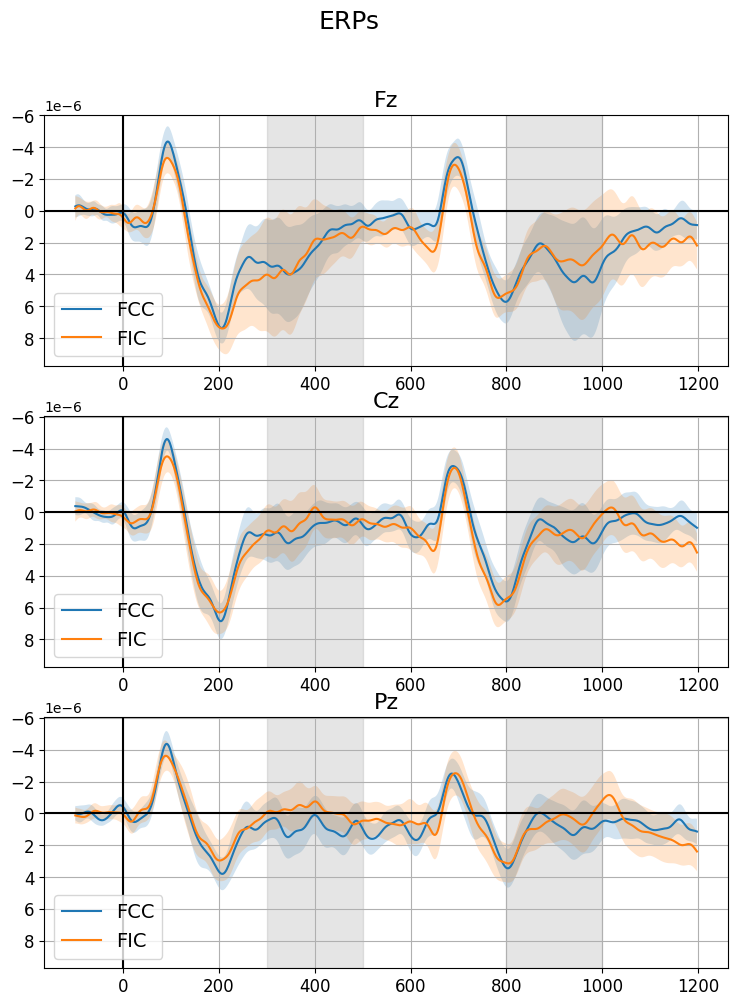

In [45]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data_sd_lan, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax1 = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_lt_long_langViol_new.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fd24f4b9670 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.65 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.82 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd200fd37f0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


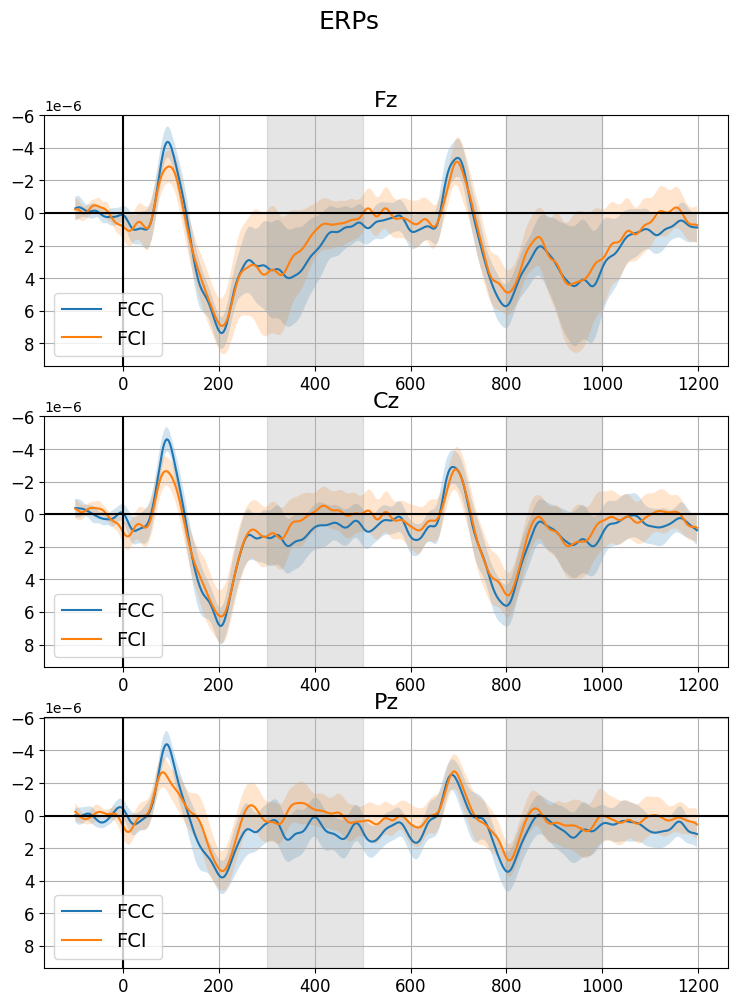

In [28]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data_sd_mus, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_lt_long_musicViol_new.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fd24f46adc0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.75 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.76 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd24fae8820 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


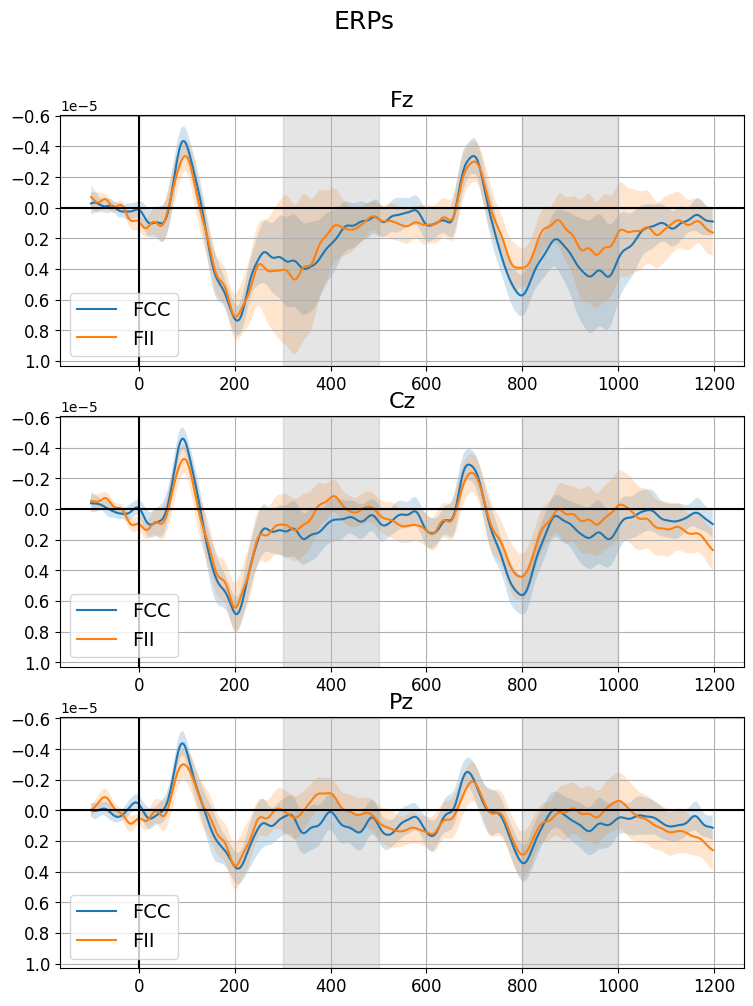

In [31]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data_sd_dub, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_lt_long_dubViol_new.pdf", bbox_inches='tight')

In [22]:
# calculate time-window avarages
print("\n[ stats/dbc19_potentials_300-500.csv ]\n")
time_window_averages(obs_data, 300, 500 ).to_csv("stats/rerps_potentials_300-500.csv",  index=False)

print("\n[ stats/dbc19_potentials_600-1000.csv ]\n")
time_window_averages(obs_data, 600, 1000).to_csv("stats/rerps_potentials_600-1000.csv", index=False)

print("\n[ stats/dbc19_potentials_700-1000.csv ]\n")
time_window_averages(obs_data, 700, 1000).to_csv("stats/rerps_potentials_700-1000.csv", index=False)

print("\n[ stats/dbc19_potentials_800-1000.csv ]\n")
time_window_averages(obs_data, 800, 1000).to_csv("stats/rerps_potentials_800-1000.csv", index=False)


[ stats/dbc19_potentials_300-500.csv ]

[dv_splits()]: Sorting set ... ( 0x7fcd996b8550 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.72 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 1.14 seconds.

[ stats/dbc19_potentials_600-1000.csv ]

[dv_splits()]: Sorting set ... ( 0x7fcdc84ef700 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.42 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 2.34 seconds.

[ stats/dbc19_potentials_700-1000.csv ]

[dv_splits()]: Sorting set ... ( 0x7fcd2fc83130 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.07 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 1.73 seconds.

[ stats/dbc19_potentials_800-1000.csv ]

[dv_splits()]: Sorting set ... ( 0x7fcdc3eb4130 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.72 seconds.
[DataSummary.

## Long-distance dependencies

[dv_splits()]: Sorting set ... ( 0x7f2f51adb520 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 4.73 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.71 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f55768490 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


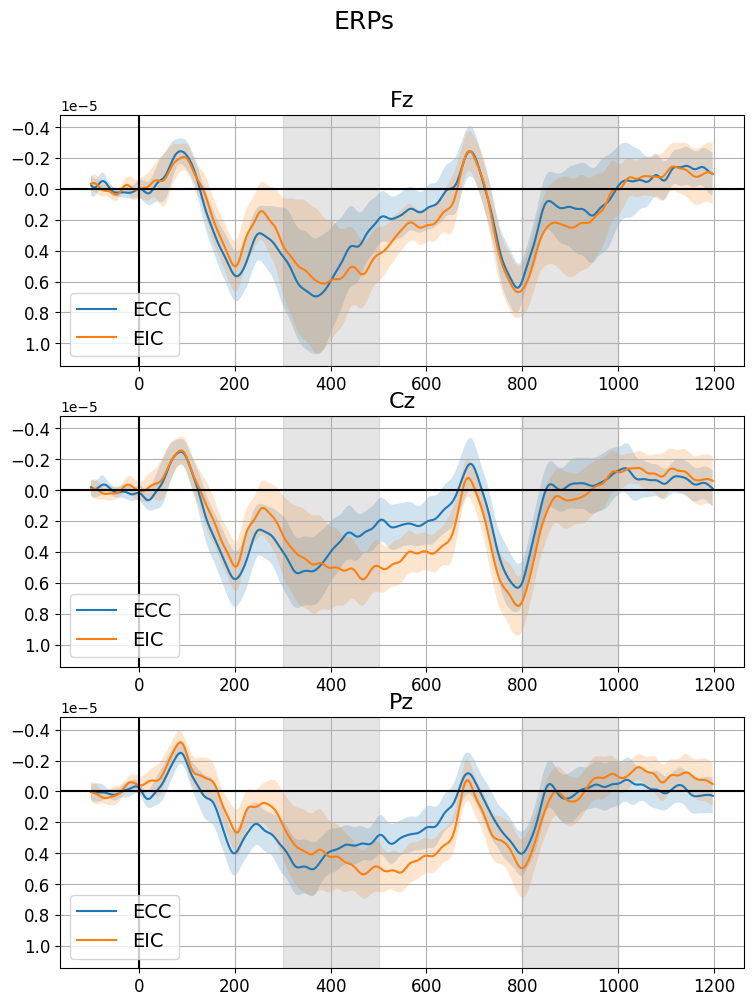

In [20]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data_ld_lan, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_lt_long_langViol_new.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f2f51adbca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 4.64 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.94 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f55948e50 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


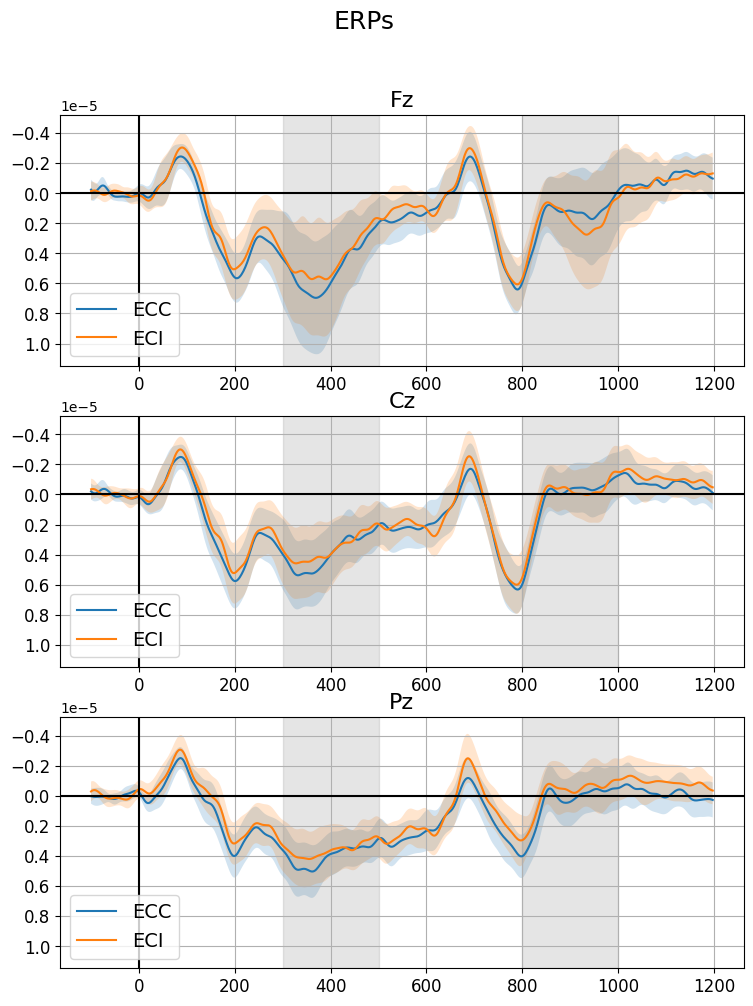

In [21]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data_ld_mus, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_lt_long_musicViol_new.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f2f51acf3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.61 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.75 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f45040100 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


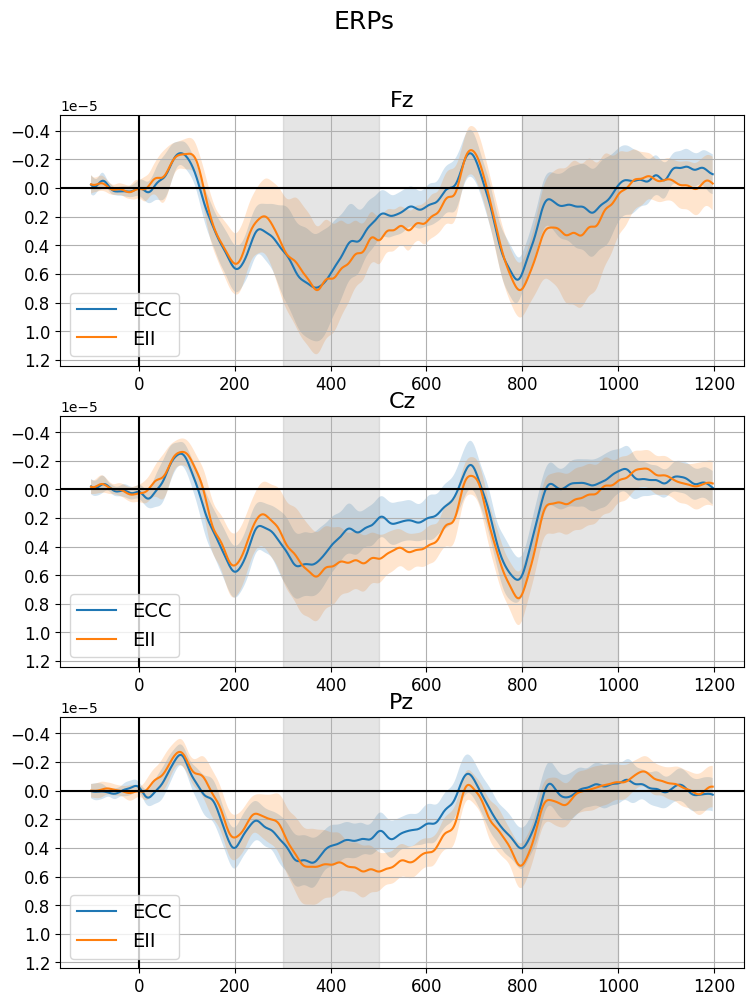

In [22]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data_ld_dub, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax2 = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_lt_long_dubViol_new.pdf", bbox_inches='tight')

# Intercept-only

[dv_splits()]: Sorting set ... ( 0x7fd560567790 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 14.23 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 4.83 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd560567790 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 14.05 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd526a7e9a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.01 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.76 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd4f76cf8e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 19.97 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.17 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd4ffb81340 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 sec

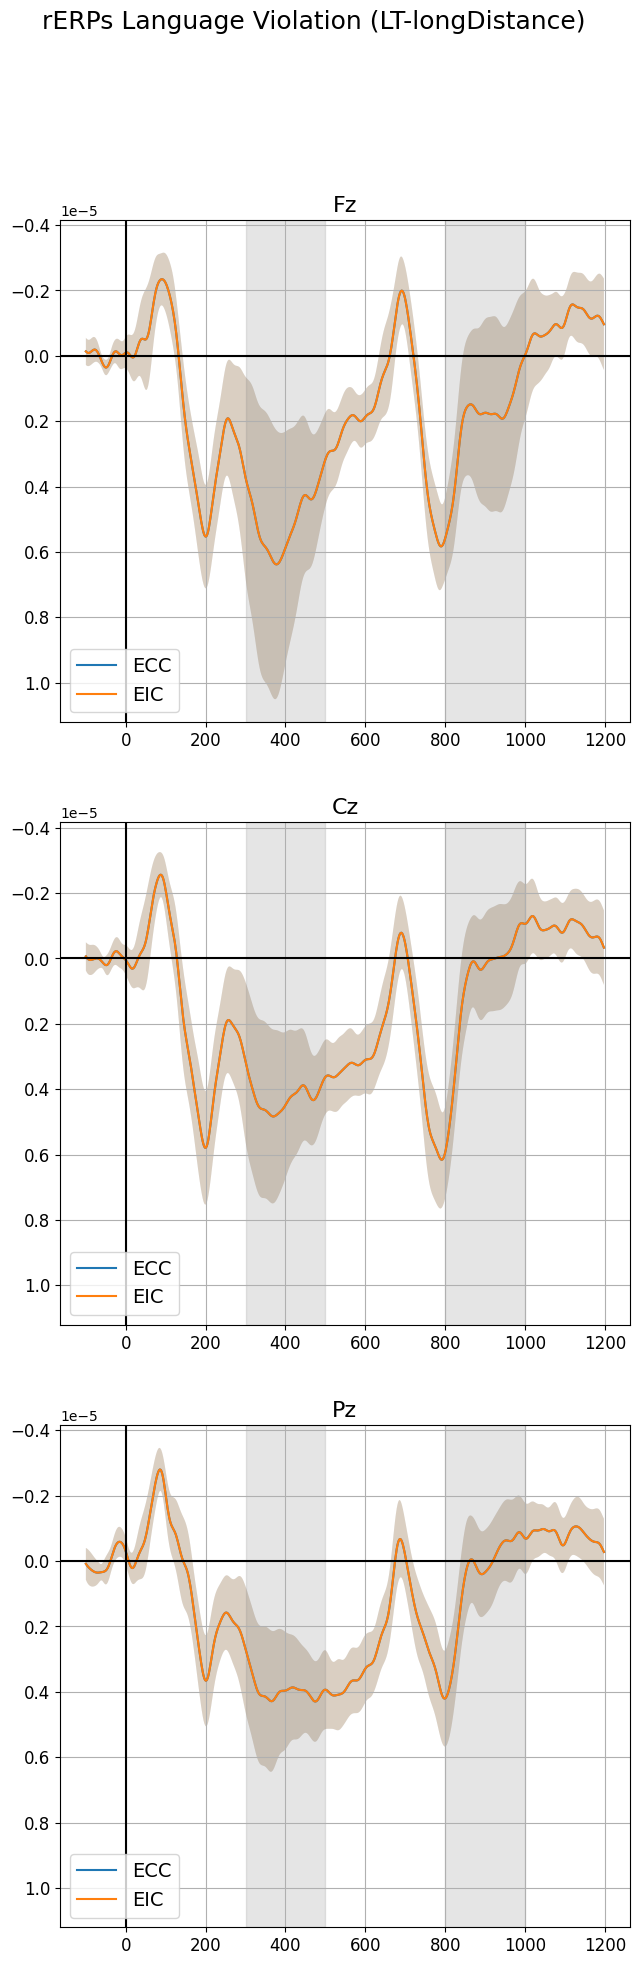

In [17]:
models = rerps.models.regress(obs_data_lan, ["Subject", "Time"], [])
est_data_lan = rerps.models.estimate(obs_data_lan, models)

est_data_summary = rerps.models.DataSummary(est_data_lan, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array, 
        "Condition", title="rERPs Language Violation (LT-longDistance)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30,15)
fig.savefig("figures/rerp_lt_long_langViol_interc.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fd56098acd0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 13.78 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 4.86 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd56098acd0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 13.88 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd4fd3488e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.01 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.78 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd52759aeb0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 19.85 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.16 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd5275958b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 sec

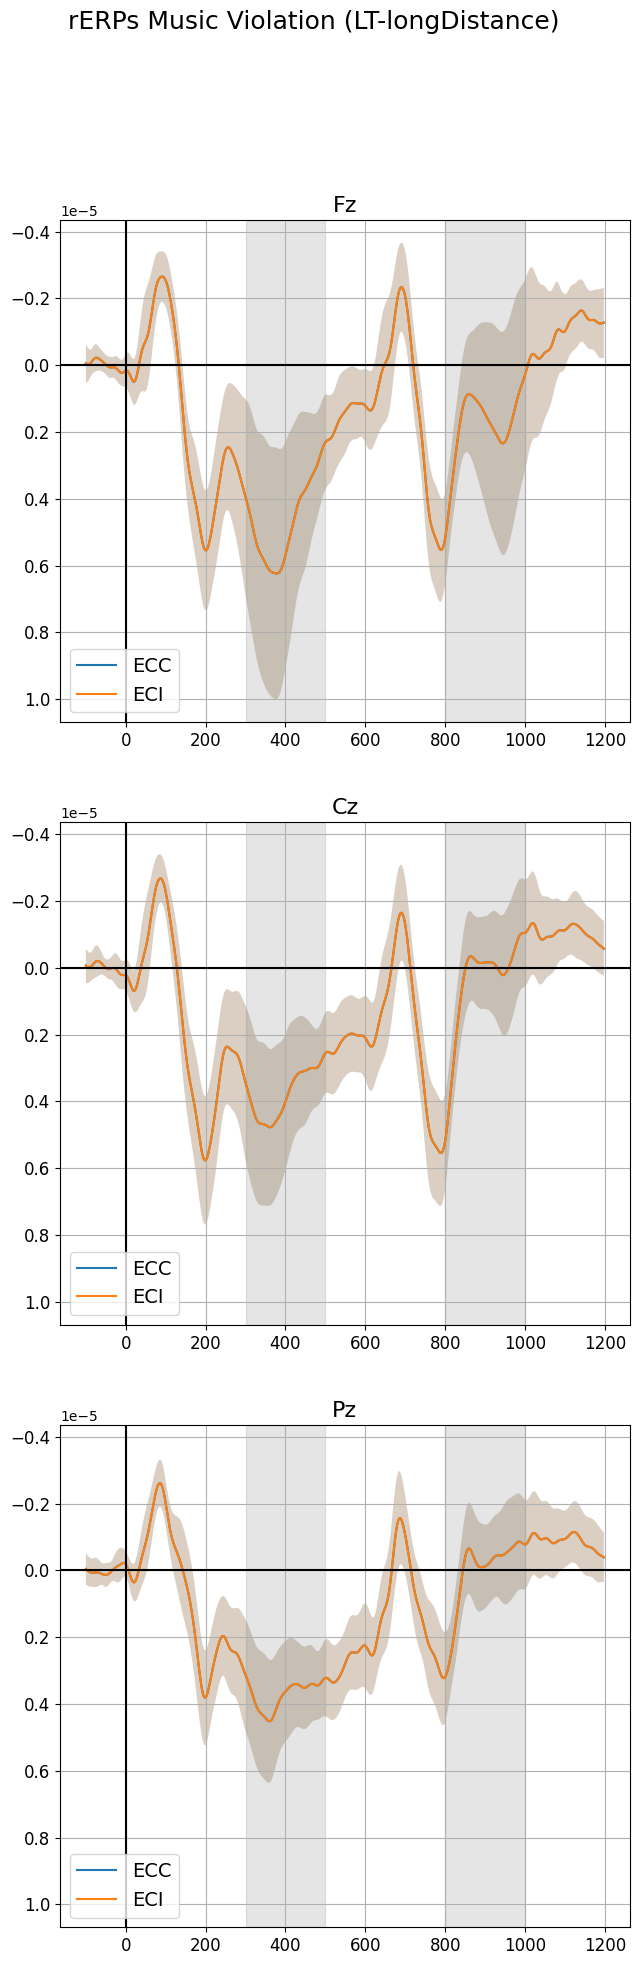

In [18]:
models = rerps.models.regress(obs_data_mus, ["Subject", "Time"], [])
est_data_mus = rerps.models.estimate(obs_data_mus, models)

est_data_summary = rerps.models.DataSummary(est_data_mus, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array, 
        "Condition", title="rERPs Music Violation (LT-longDistance)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30,15)
fig.savefig("figures/rerp_lt_long_musicViol_interc.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fd4fd426460 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 13.77 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.02 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd4fd426460 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 13.73 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd527626b80 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.01 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.79 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd4ffb13d60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 19.3 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.22 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd50fe05220 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seco

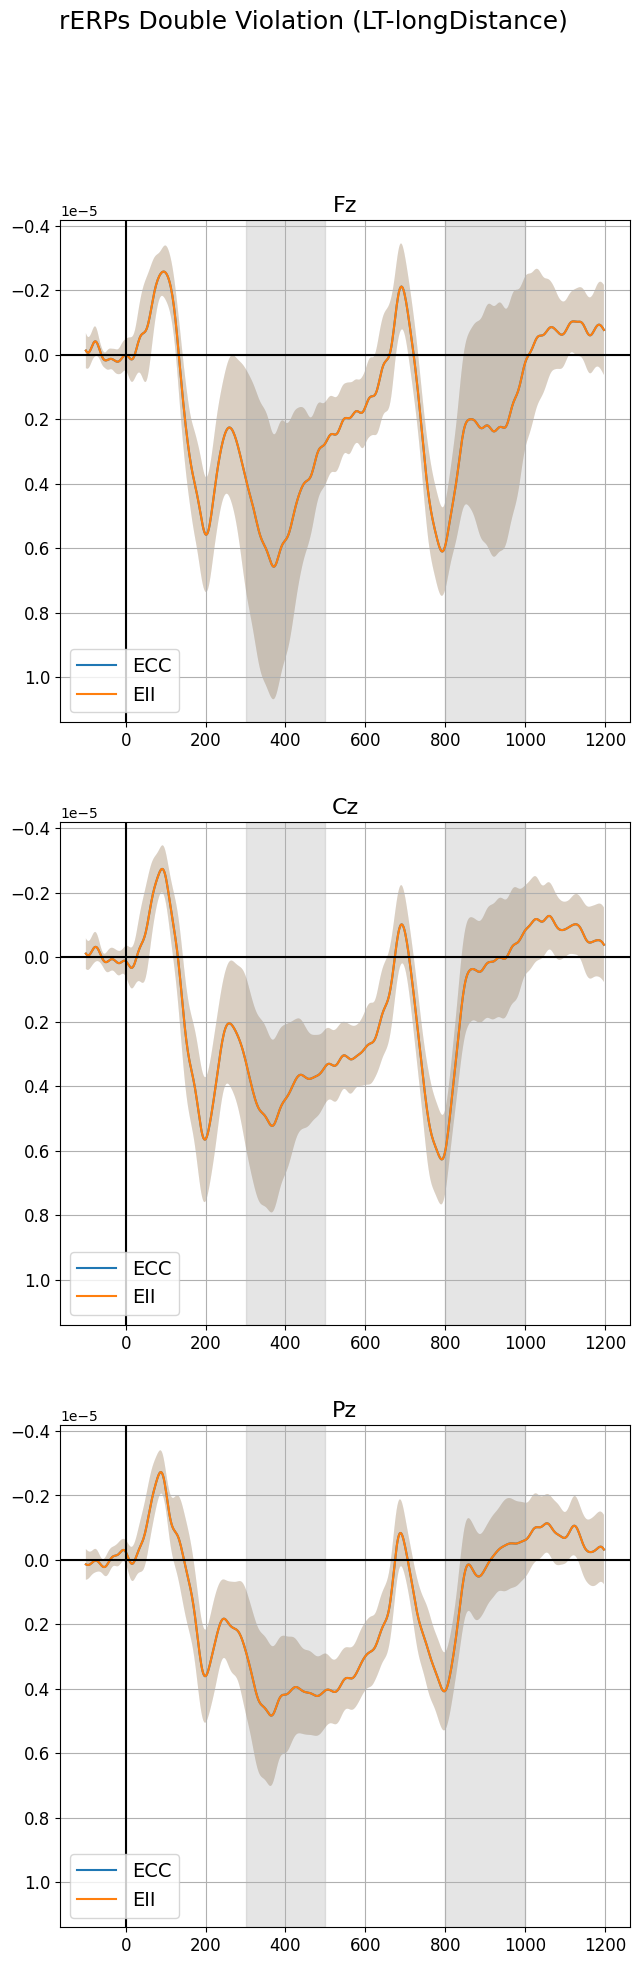

In [19]:
models = rerps.models.regress(obs_data_dub, ["Subject", "Time"], [])
est_data_dub = rerps.models.estimate(obs_data_dub, models)

est_data_summary = rerps.models.DataSummary(est_data_dub, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array, 
        "Condition", title="rERPs Double Violation (LT-longDistance)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("figures/rerp_lt_long_dubViol_interc.pdf", bbox_inches='tight')

## Residuals

[dv_splits()]: Sorting set ... ( 0x7fd560567790 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 25.43 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd4f76cf8e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 25.41 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd52757b340 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 22.61 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.96 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd5275a2e50 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


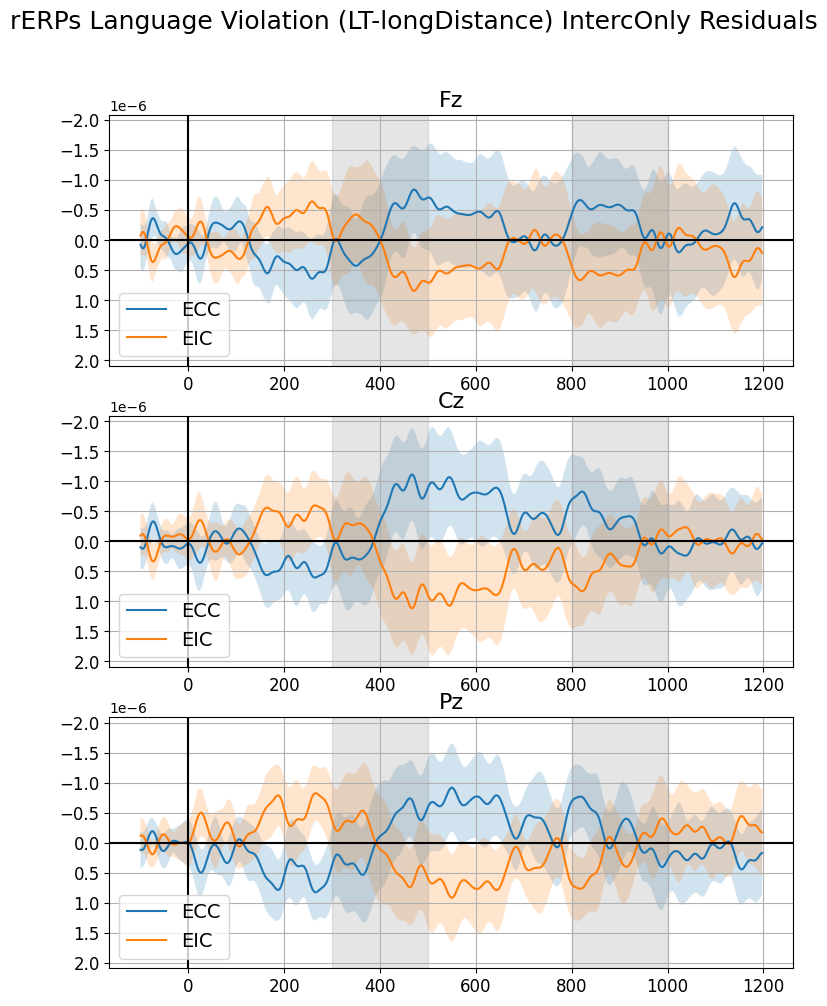

In [25]:
res_data = rerps.models.residuals(obs_data_lan, est_data_lan)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="rERPs Language Violation (LT-longDistance) IntercOnly Residuals", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("figures/rerp_lt_long_langViol_intercRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fd56098acd0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 21.08 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd52759aeb0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 20.94 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd5241c63a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 19.56 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.11 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd4fd3d0eb0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.12 seconds.


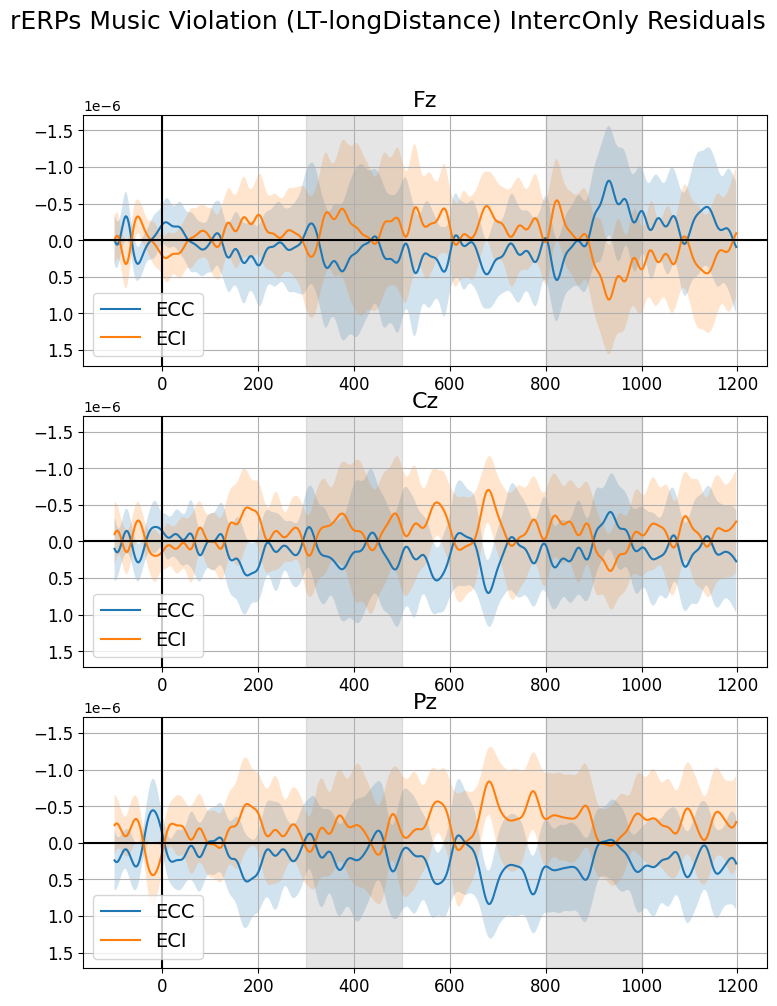

In [24]:
res_data = rerps.models.residuals(obs_data_mus, est_data_mus)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="rERPs Music Violation (LT-longDistance) IntercOnly Residuals", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("figures/rerp_lt_long_musicViol_intercRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fd4fd426460 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 21.23 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd4ffb13d60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 21.09 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd526d4a190 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 20.16 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.55 seconds.
[dv_splits()]: Sorting set ... ( 0x7fd5275c8c10 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.13 seconds.


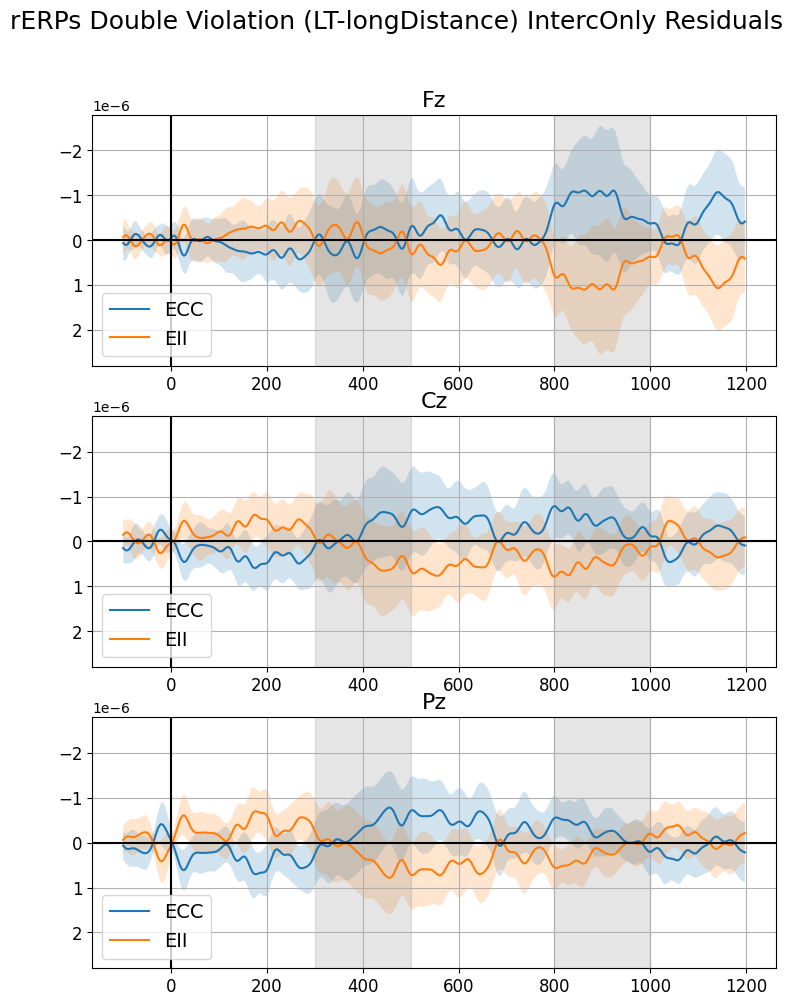

In [26]:
res_data = rerps.models.residuals(obs_data_dub, est_data_dub)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="rERPs Double Violation (LT-longDistance) IntercOnly Residuals", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("figures/rerp_lt_long_dubViol_intercRes.pdf", bbox_inches='tight')

# Modelling

## Language Violation only

[dv_splits()]: Sorting set ... ( 0x7fbb51129250 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.91 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.31 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb51129250 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.0 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbbbea3ba30 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.88 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb779229d0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.62 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.57 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb47e31b20 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds

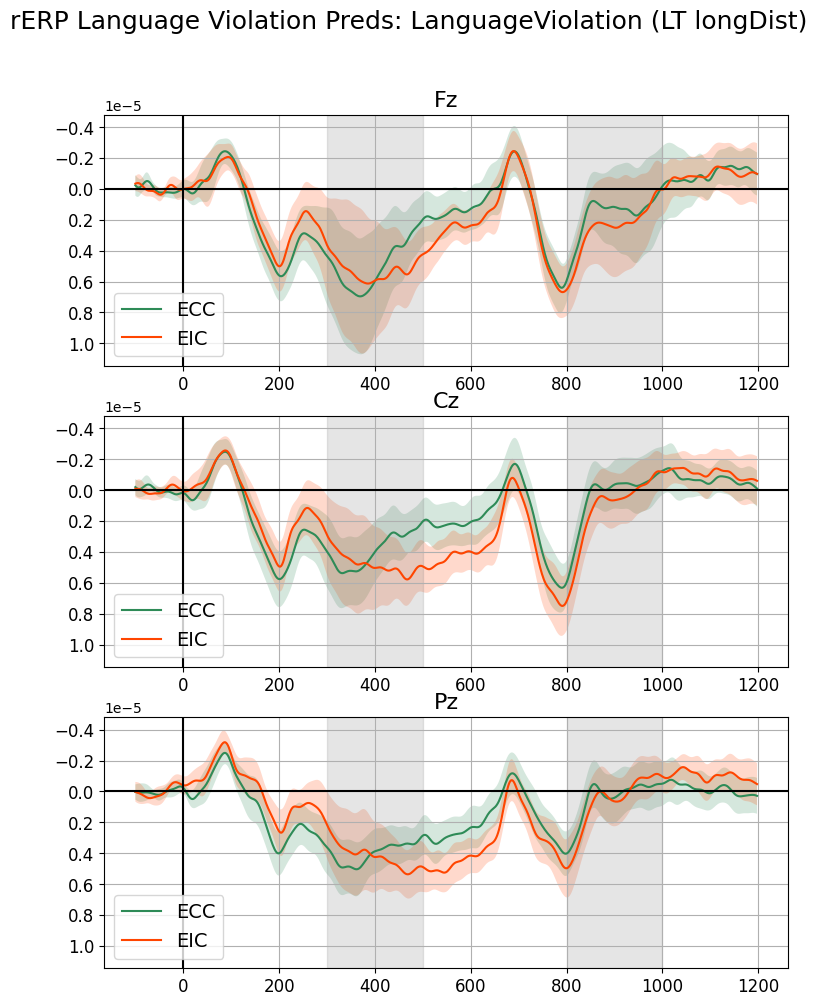

In [46]:
reg_model = rerps.models.regress(obs_data_ld_lan, ["Subject", "Time"], ["LanguageViolation"])
est_data_lan_langViol = rerps.models.estimate(obs_data_ld_lan, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_lan_langViol, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["seagreen", "orangered"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERP Language Violation Preds: LanguageViolation (LT longDist)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7fbb51129250 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.88 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb779229d0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.42 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb29172cd0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.55 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.67 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb2908fa00 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


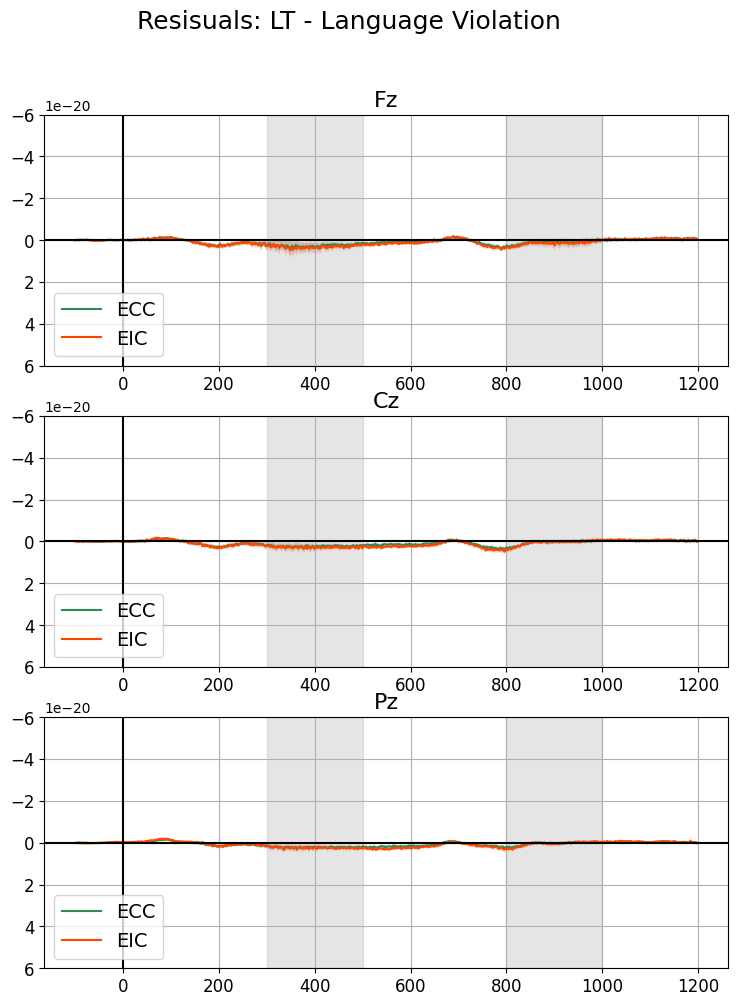

In [47]:
res_data = rerps.models.residuals(obs_data_ld_lan, est_data_lan_langViol)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["seagreen", "orangered"]
factor = 1e-20
new_ymin = 6 * factor
new_ymax = -6 * factor

fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array, "Condition",
                                         title="Resisuals: LT - Language Violation",
                                         colors=colors, ymin=new_ymin, ymax=new_ymax, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)

fig.savefig("finalPlots/residuals_lt_langViol.pdf", bbox_inches='tight')

## Music Violation only

[dv_splits()]: Sorting set ... ( 0x7fbb514ab820 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.85 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.38 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb514ab820 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.98 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb51018eb0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.83 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb562a4940 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.59 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.55 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb84bb0280 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 second

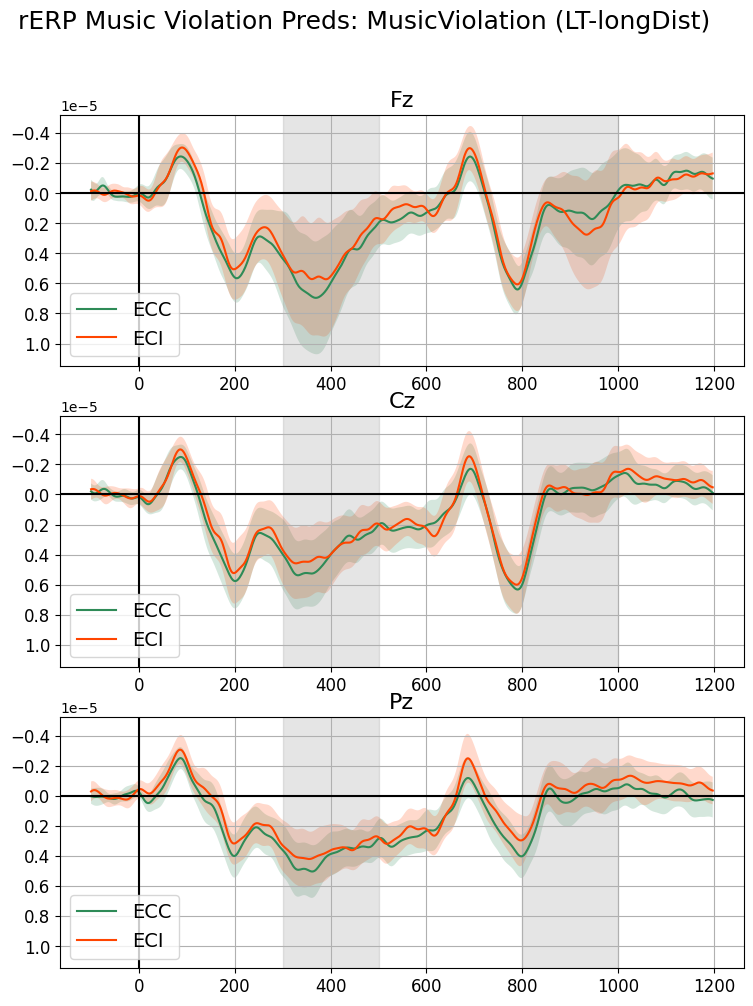

In [50]:
reg_model = rerps.models.regress(obs_data_ld_mus, ["Subject", "Time"], ["MusicViolation"])
est_data_mus_musicViol = rerps.models.estimate(obs_data_ld_mus, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_mus_musicViol, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["seagreen", "orangered"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERP Music Violation Preds: MusicViolation (LT-longDist)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7fbb514ab820 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.88 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb562a4940 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.42 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb51404e80 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.54 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.63 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb290b1100 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


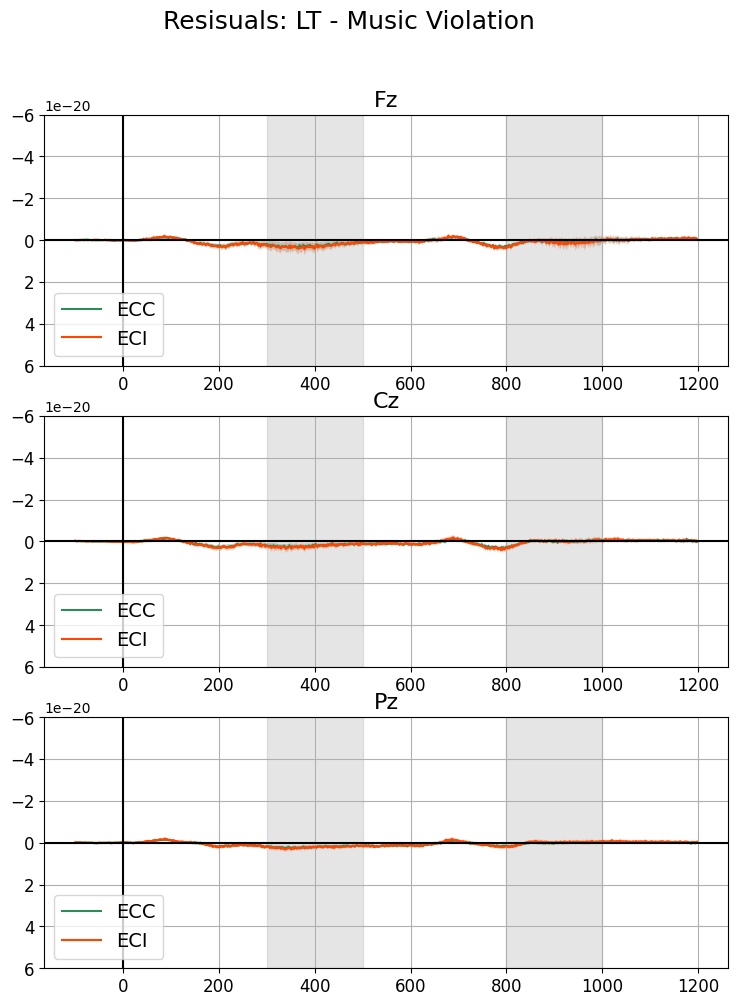

In [51]:
res_data = rerps.models.residuals(obs_data_ld_mus, est_data_mus_musicViol)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["seagreen", "orangered"]
factor = 1e-20
new_ymin = 6 * factor
new_ymax = -6 * factor

fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array, "Condition",
                                         title="Resisuals: LT - Music Violation",
                                         colors=colors, ymin=new_ymin, ymax=new_ymax, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)

fig.savefig("finalPlots/residuals_lt_musicViol.pdf", bbox_inches='tight')

## Double Violation

[dv_splits()]: Sorting set ... ( 0x7f2f51acf3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.0 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.4 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f51acf3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.54 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f095f15e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 1.06 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f51c53c70 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.23 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.78 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f2917d2b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.

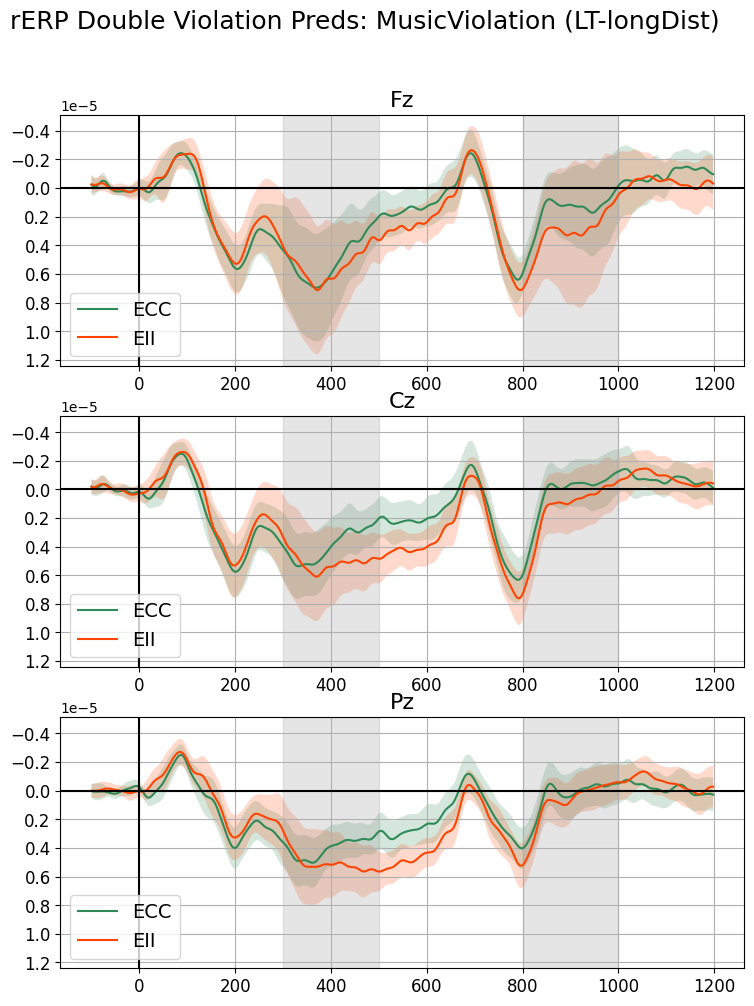

In [45]:
reg_model = rerps.models.regress(obs_data_ld_dub, ["Subject", "Time"], ["MusicViolation"])
est_data_dub_musicViol = rerps.models.estimate(obs_data_ld_dub, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_dub_musicViol, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["seagreen", "orangered"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERP Double Violation Preds: MusicViolation (LT-longDist)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7f2f51acf3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.72 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f51c53c70 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.42 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f536138b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.22 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.84 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f45031a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


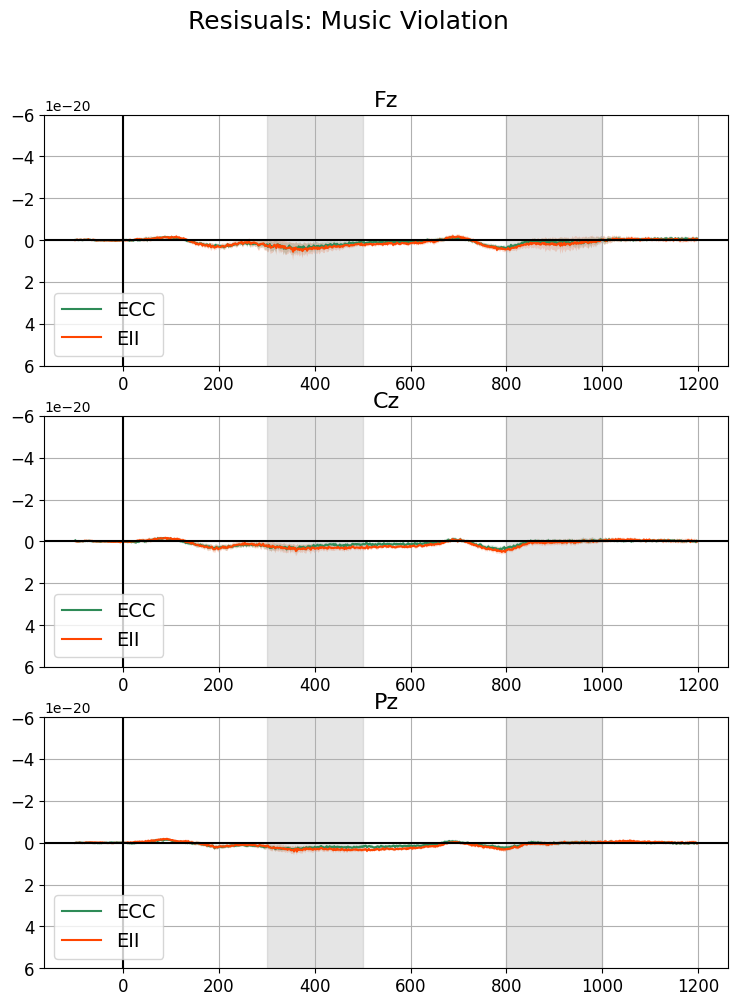

In [46]:
res_data = rerps.models.residuals(obs_data_ld_dub, est_data_dub_musicViol)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["seagreen", "orangered"]
factor = 1e-20
new_ymin = 6 * factor
new_ymax = -6 * factor

fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array, "Condition",
                                         title="Resisuals: Music Violation",
                                         colors=colors, ymin=new_ymin, ymax=new_ymax, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)

# fig.savefig("figures/rerp_lt_long_dubViol_musicViolRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f2f51acf3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.51 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.48 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f51acf3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.5 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f446b8070 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 1.01 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f51dd0b20 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.91 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.53 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f291d98b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds

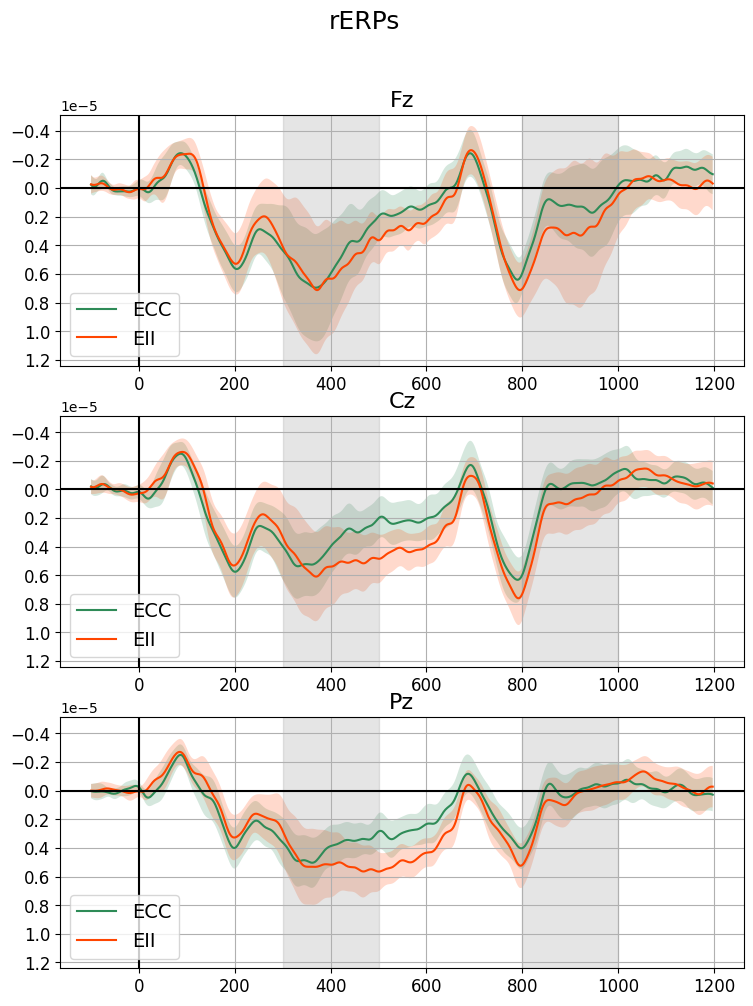

In [47]:
reg_model = rerps.models.regress(obs_data_ld_dub, ["Subject", "Time"], ["LanguageViolation"])
est_data_dub_langViol = rerps.models.estimate(obs_data_ld_dub, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_dub_langViol, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["seagreen", "orangered"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

fig.set_size_inches(30, 15)

[dv_splits()]: Sorting set ... ( 0x7f2f51acf3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.7 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f51dd0b20 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.38 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f40cc6130 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.54 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.56 seconds.
[dv_splits()]: Sorting set ... ( 0x7f2f55888c10 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


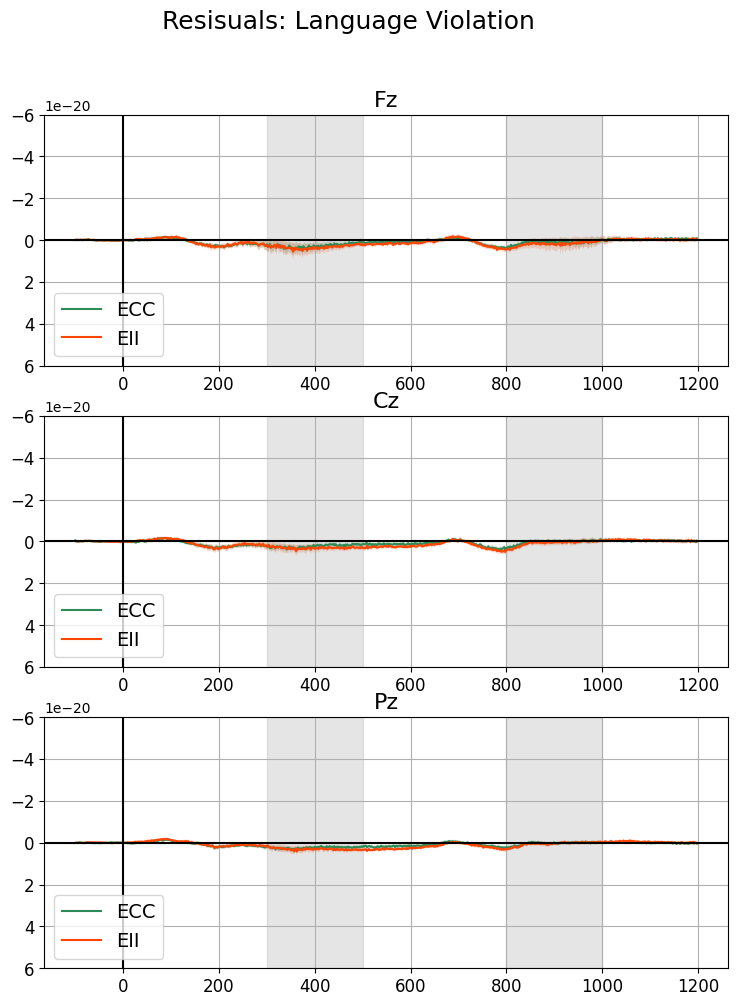

In [48]:
res_data = rerps.models.residuals(obs_data_ld_dub, est_data_dub_langViol)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["seagreen", "orangered"]
factor = 1e-20
new_ymin = 6 * factor
new_ymax = -6 * factor

fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array, "Condition",
                                         title="Resisuals: Language Violation",
                                         colors=colors, ymin=new_ymin, ymax=new_ymax, hlt_tws=[(300,500), (800,1000)])

fig.set_size_inches(30, 15)

# fig.savefig("figures/rerp_lt_long_dubViol_langViolRes.pdf", bbox_inches='tight')

# Estimating all conditions

In [4]:
# Create DataSet object including all conditions in LT
obs_data = rerps.models.DataSet(
    data    = df,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data.array[:,obs_data.descriptors["Time"]] = obs_data.array[:,obs_data.descriptors["Time"]] * 1000
# obs_data.array = obs_data.array[(obs_data.array[:,obs_data.descriptors["cond"]] >= 125) & (obs_data.array[:,obs_data.descriptors["cond"]] <= 128) ,:]

# z-standardization
obs_data.zscore_predictor("MelodyRating")
# obs_data.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data.array[:,obs_data.predictors["MelodyRating"]] *= -1
# obs_data.array[:,obs_data.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 1.39 seconds.


[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 6.62 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.61 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb7a288460 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.22 seconds.


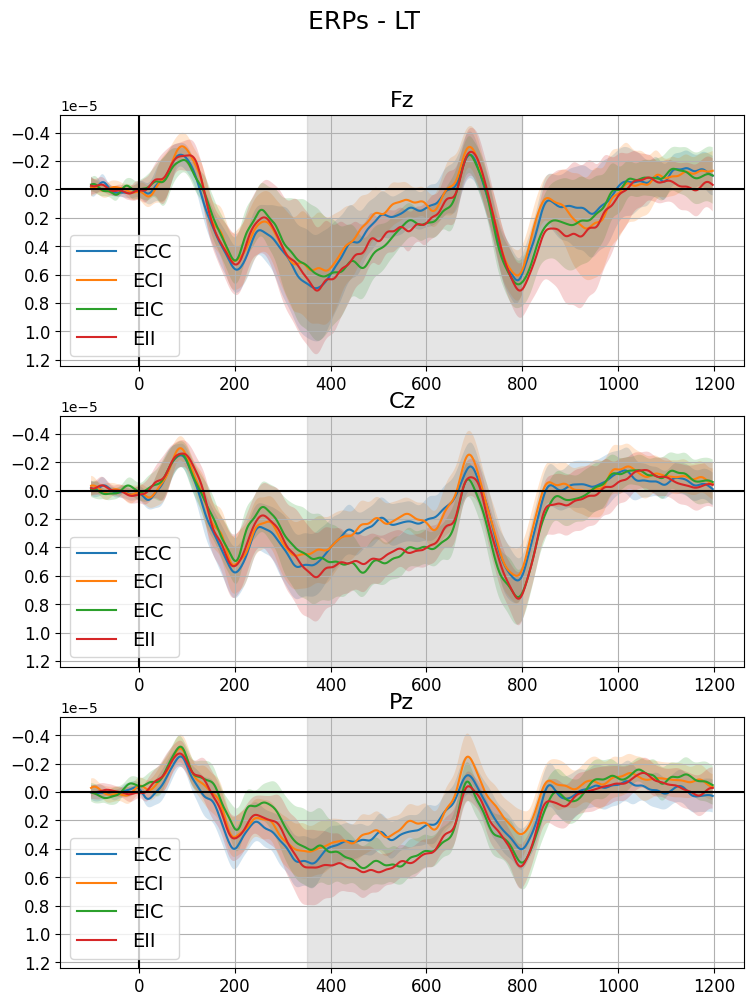

In [52]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs - LT", colors=colors, hlt_tws=[(350, 800)])

legend_fontsize = 10
fig.set_size_inches(30,15)
fig.savefig( 'finalPlots/erps_lt.pdf', bbox_inches='tight' )

[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.2 seconds.
[regress()]: Fitting 1998 models ...
[regress()]: Completed in 1.48 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.16 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb931e0b50 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 1.8 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb292f65e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.47 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 10.27 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb292ba0a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.24 seconds.


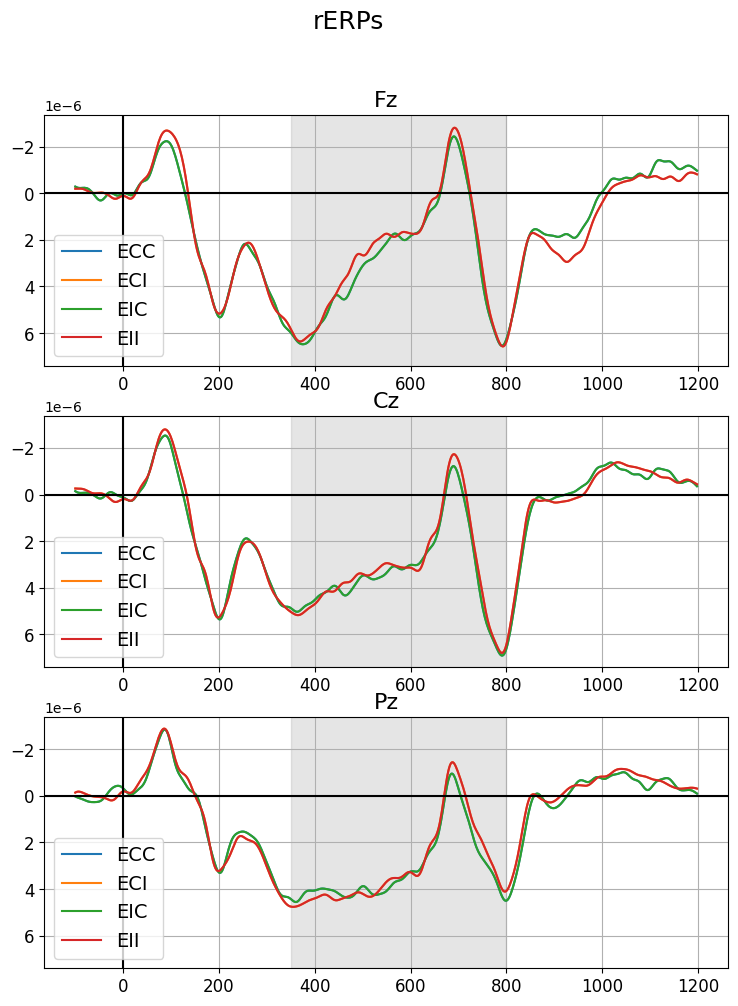

In [29]:
# MUSIC only
reg_model = rerps.models.regress(obs_data, ["Time"], ["MusicViolation"])
est_data_all = rerps.models.estimate(obs_data, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_all, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERPs", colors=colors, hlt_tws=[(350, 800)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 9.13 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb292f65e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 7.57 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb4d02e520 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.96 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 10.19 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb292ed130 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.25 seconds.


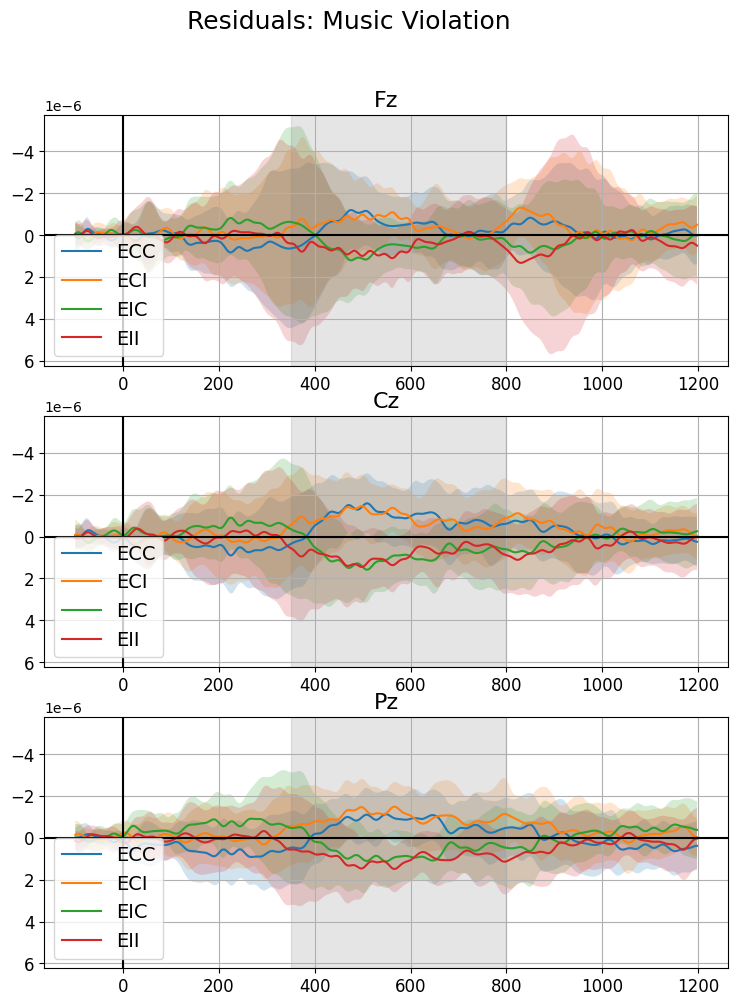

In [30]:
res_data = rerps.models.residuals(obs_data, est_data_all)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="Residuals: Music Violation", colors=colors, hlt_tws=[(350, 800)])
fig.set_size_inches(30, 15)
# fig.savefig("figures/rerp_lt_long_fullModelRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.33 seconds.
[regress()]: Fitting 1998 models ...
[regress()]: Completed in 1.64 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.59 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb5115ec10 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 2.36 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb50f5e490 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 6.5 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.97 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb57e87730 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.22 seconds.


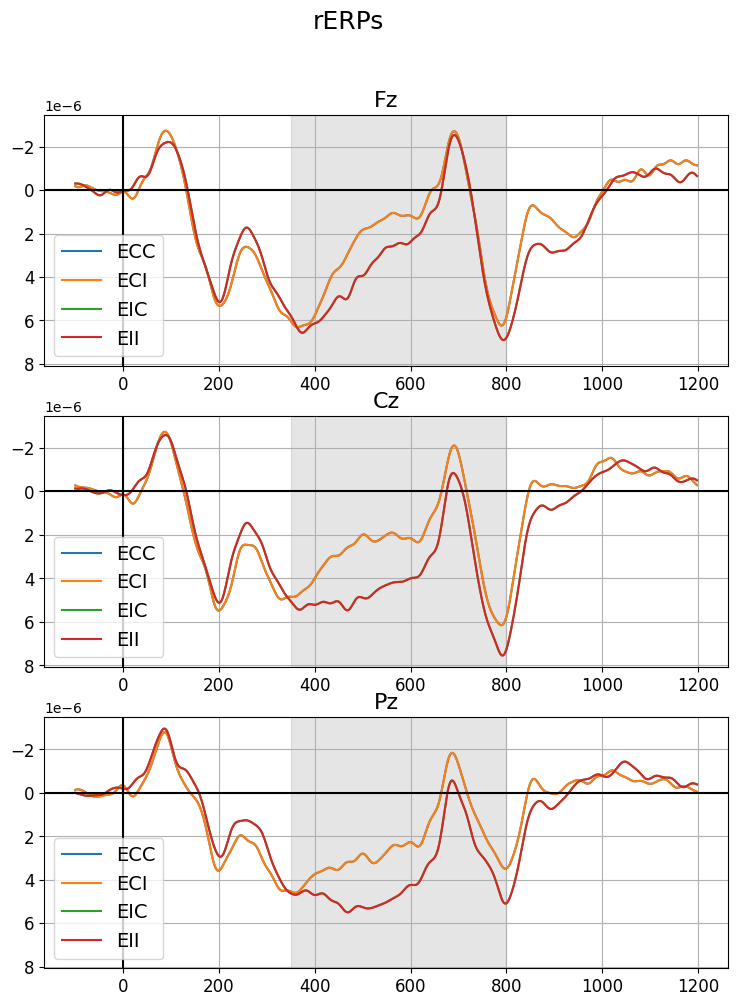

In [31]:
# LANGUAGE only
reg_model = rerps.models.regress(obs_data, ["Time"], ["LanguageViolation"])
est_data_all = rerps.models.estimate(obs_data, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_all, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERPs", colors=colors, hlt_tws=[(350,800)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 10.22 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb50f5e490 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 8.83 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb5145d0d0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 7.24 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.93 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb5145de20 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.06 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.22 seconds.


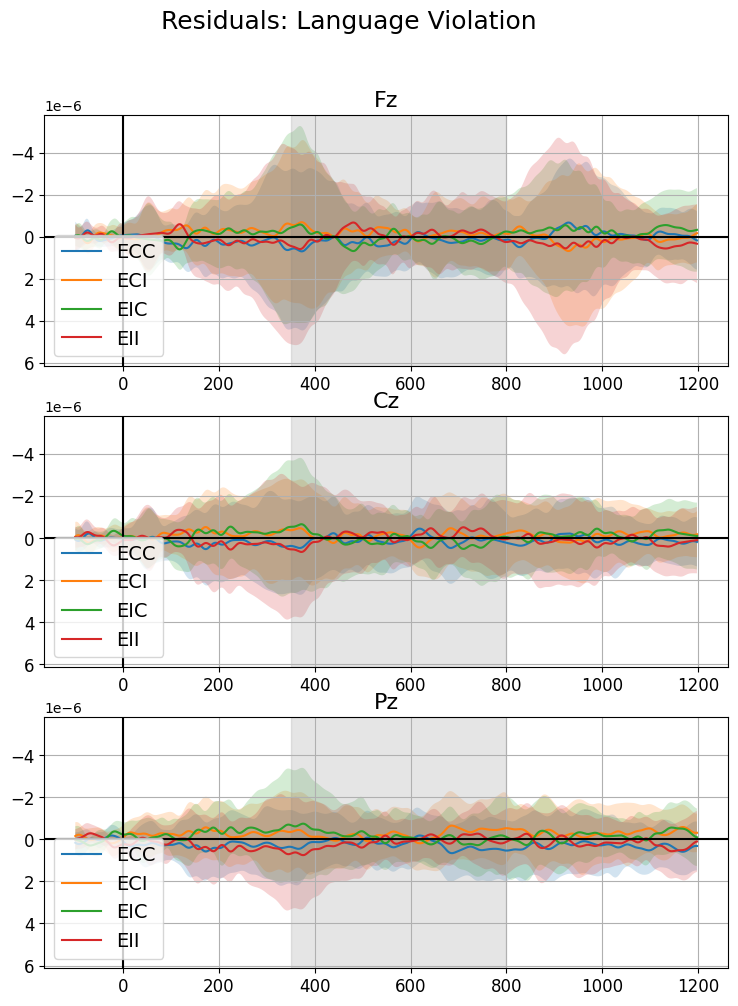

In [32]:
res_data = rerps.models.residuals(obs_data, est_data_all)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="Residuals: Language Violation", colors=colors, hlt_tws=[(350, 800)])

fig.set_size_inches(30, 15)

# fig.savefig("figures/rerp_lt_long_fullModelRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.69 seconds.
[regress()]: Fitting 1998 models ...
[regress()]: Completed in 1.57 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.07 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb291679a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 3.0 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb50d900d0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.46 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.4 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb9b3e8ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.21 seconds.


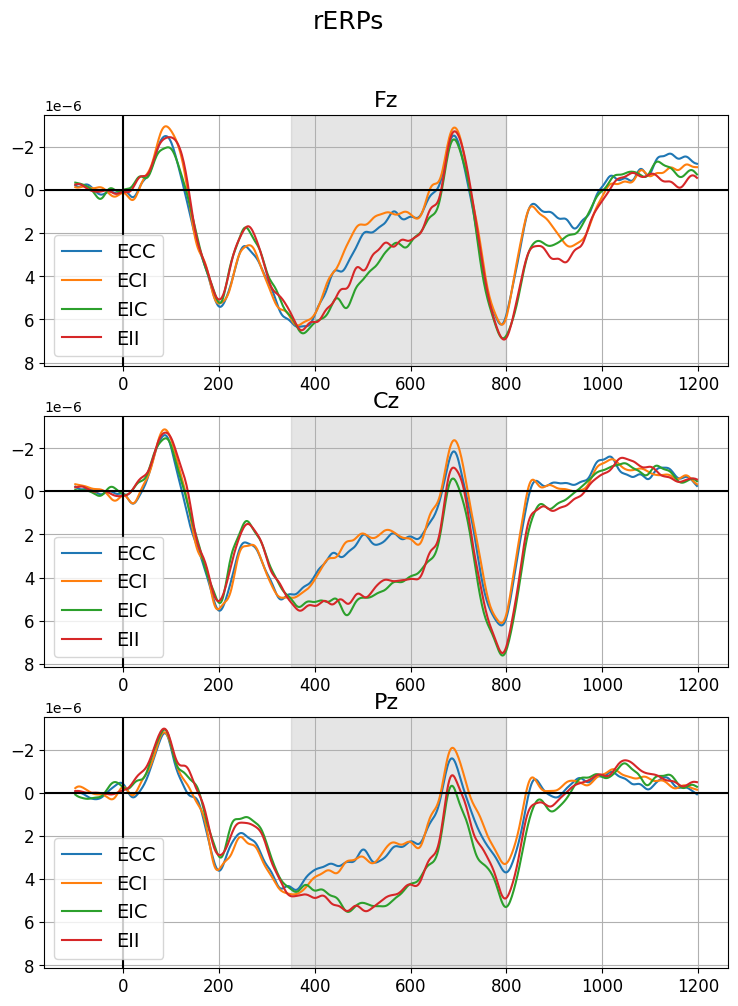

In [62]:
# LANGUAGE + MUSIC
reg_model = rerps.models.regress(obs_data, ["Time"], ["LanguageViolation", "MusicViolation"])
est_data_all = rerps.models.estimate(obs_data, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_all, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERPs", colors=colors, hlt_tws=[(350,800)])
fig.set_size_inches(30, 15)

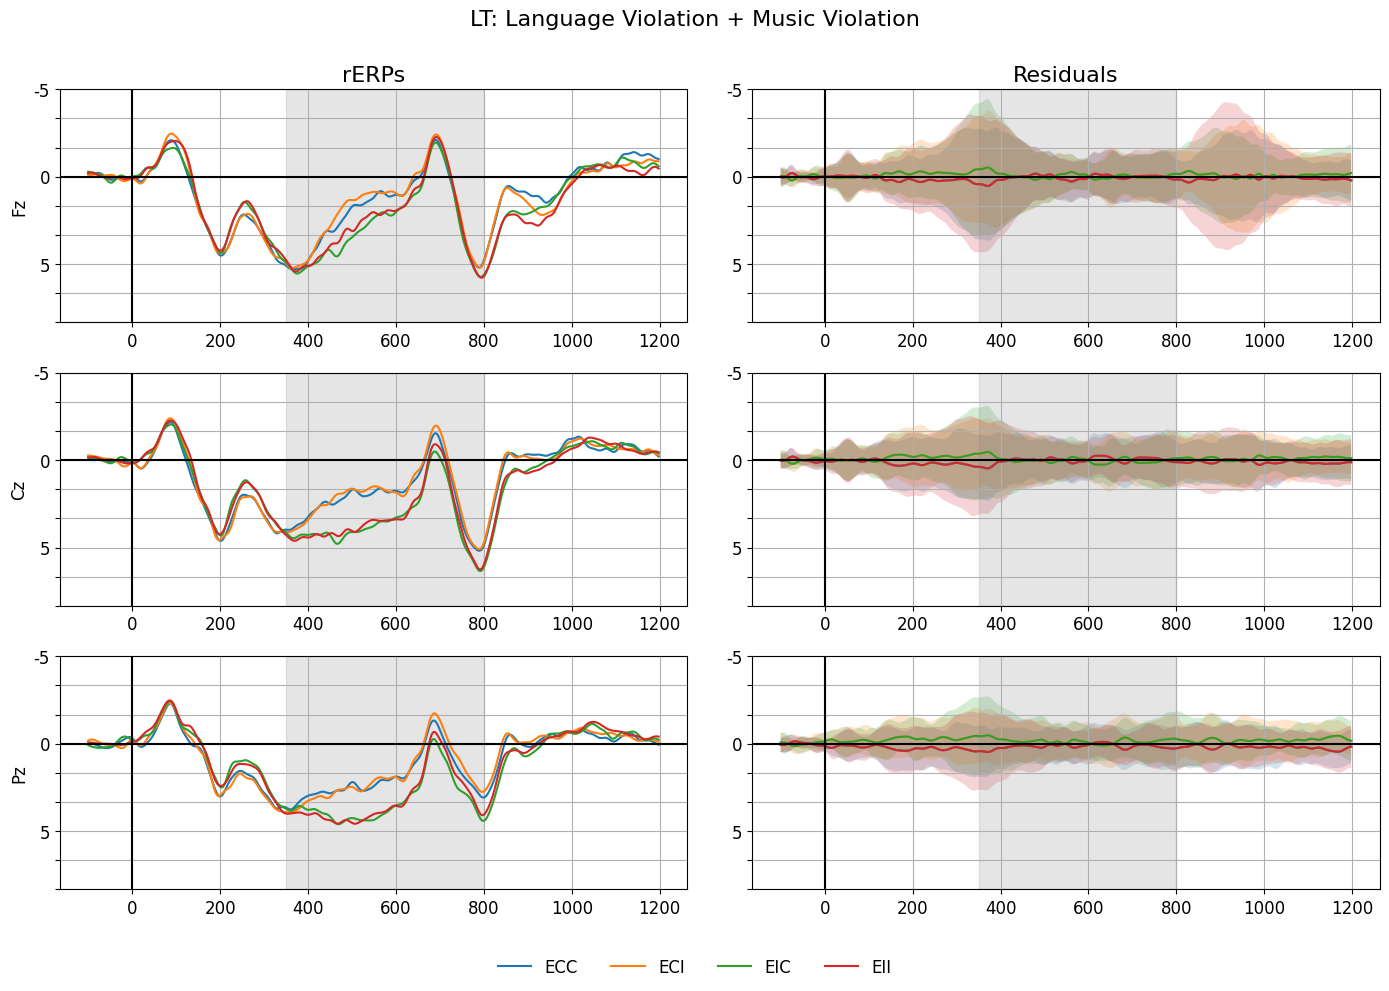

In [117]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a figure with subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14, 10), sharey=True, sharex=True)

rerps.plots.plot_voltages(est_data_summary, "Time", 'Fz', groupby="Condition",
                          title="rERPs", legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax1)

rerps.plots.plot_voltages(est_data_summary, "Time", 'Cz', groupby="Condition",
                          title=None, legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax3)

rerps.plots.plot_voltages(est_data_summary, "Time", 'Pz', groupby="Condition",
                          title=None, legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax5)


rerps.plots.plot_voltages(res_data_summary, "Time", 'Fz', groupby="Condition",
                          title="Residuals", legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax2)

rerps.plots.plot_voltages(res_data_summary, "Time", 'Cz', groupby="Condition",
                          title=None, legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax4)

rerps.plots.plot_voltages(res_data_summary, "Time", 'Pz', groupby="Condition",
                          title=None, legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax6)


for ax in [ax1, ax3, ax5]:
    ax.invert_yaxis()

# Adjust spacing between subplots
plt.tight_layout()

ax1.set_ylabel( 'Fz', fontsize='large' )
ax3.set_ylabel( 'Cz', fontsize='large' )
ax5.set_ylabel( 'Pz', fontsize='large' )

yticks = [-6.e-06, -4.e-06, -2.e-06, 0.e+00, 2.e-06, 4.e-06, 6.e-06, 8.e-06, 1.e-05]
yticklabels = ['-5', '', '', '0', '', '', '5', '', '']

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)

fig.suptitle('LT: Language Violation + Music Violation', fontsize=16)
plt.subplots_adjust(top=0.90)

handles, labels = ax1.get_legend_handles_labels()

# Create a legend at the bottom of the figure
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize='large', frameon=False)

# Adjust the layout again to make room for the legend
plt.subplots_adjust(bottom=0.10)

fig.savefig( 'finalPlots/rerps_residuals_lt.pdf', bbox_inches='tight' )

[dv_splits()]: Sorting set ... ( 0x7fbbddd29ca0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 8.51 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb50d900d0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 7.37 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb7a3cdcd0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.77 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.39 seconds.
[dv_splits()]: Sorting set ... ( 0x7fbb4f7f0640 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.21 seconds.


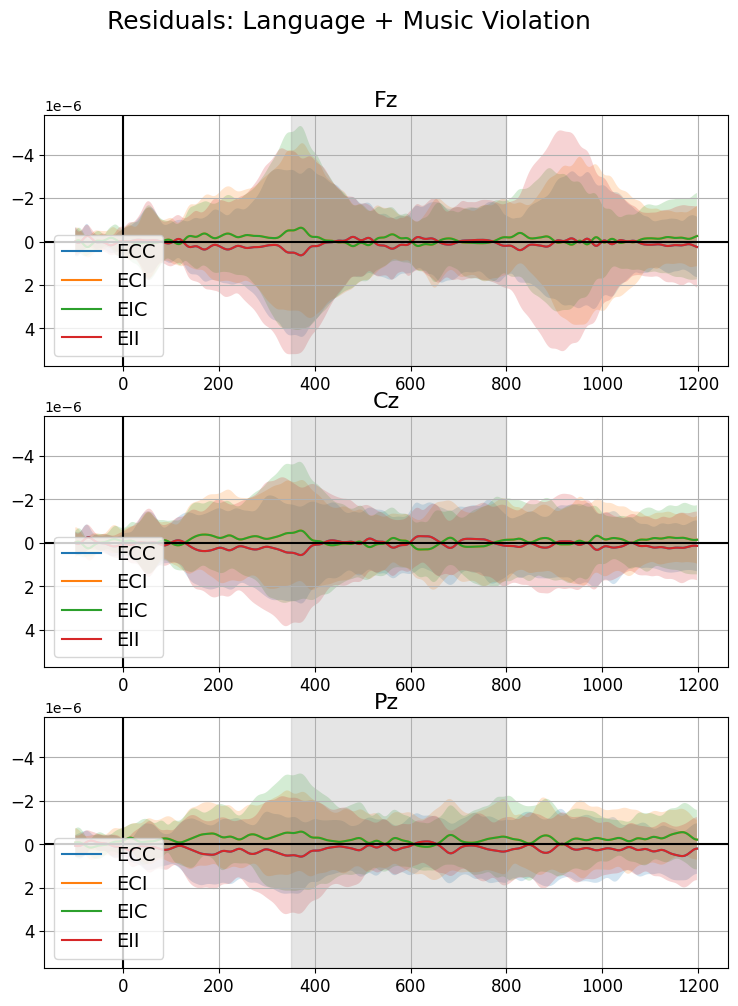

In [71]:
res_data = rerps.models.residuals(obs_data, est_data_all)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="Residuals: Language + Music Violation", colors=colors, hlt_tws=[(350, 800)])

fig.set_size_inches(30, 15)

[dv_splits()]: Sorting set ... ( 0x7fbb291679a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[ModelSummary.__init__()]: Summarizing models ...
[ModelSummary.__init__()]: Completed in 0.03 seconds.


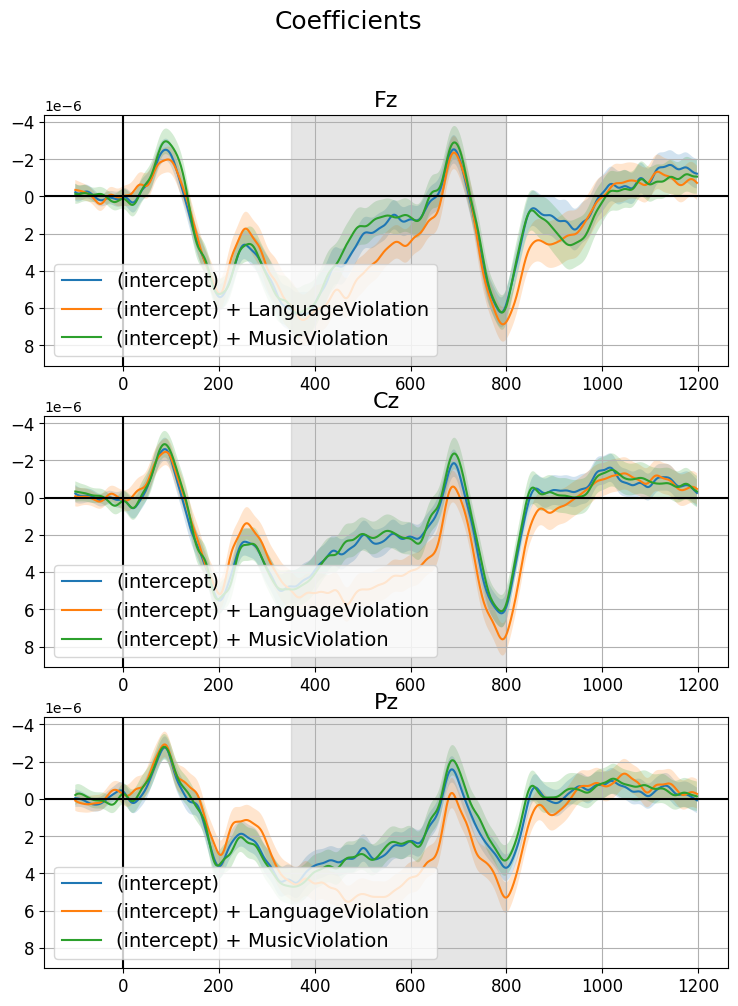

In [102]:
models_summary = rerps.models.ModelSummary(reg_model, ["Time"])
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_coefficients_grid(models_summary, "Time", array, 
                                             anchor=True, title="Coefficients", colors=colors, hlt_tws=[(350, 800)]) 
fig.set_size_inches(30, 15)

[dv_splits()]: Sorting set ... ( 0x7fbb291679a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[ModelSummary.__init__()]: Summarizing models ...
[ModelSummary.__init__()]: Completed in 0.03 seconds.


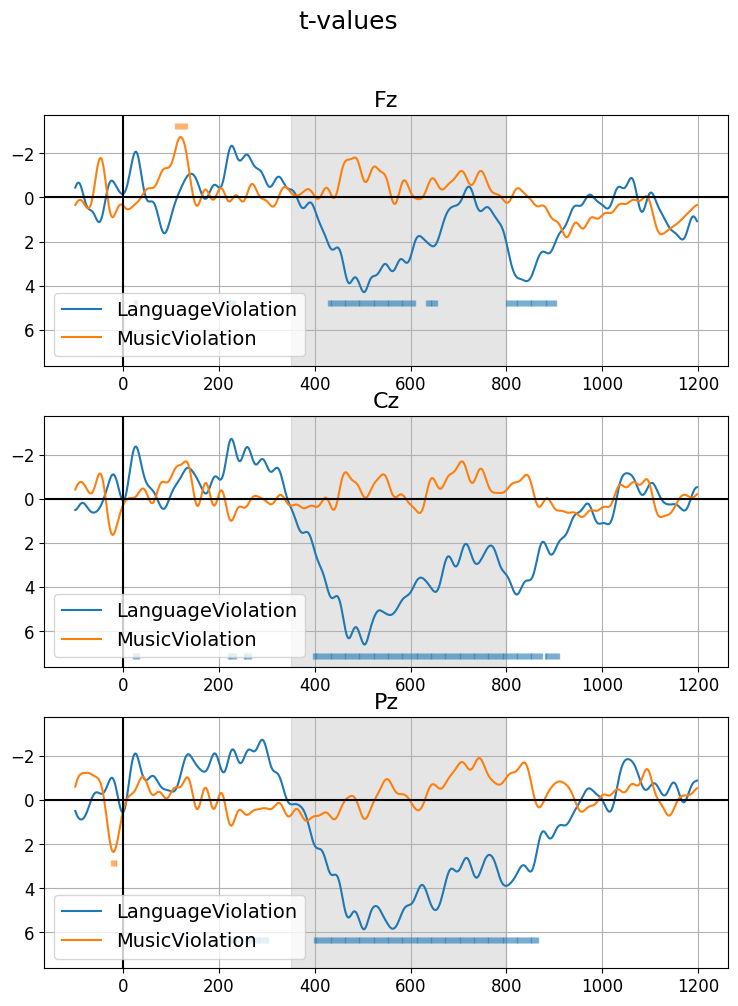

In [103]:
models = rerps.models.pvalue_correction(reg_model, "Time", [(350.7317073170731,801.4634146341464)], est_data_all.electrodes)
models_summary = rerps.models.ModelSummary(reg_model, ["Time"])

colors =  ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_tvalues_grid(models_summary, "Time", array, intercept=False,
            pvalues=True, alpha=0.05, title="t-values", colors=colors, hlt_tws=[(350, 800)])

fig.set_size_inches(30, 15)

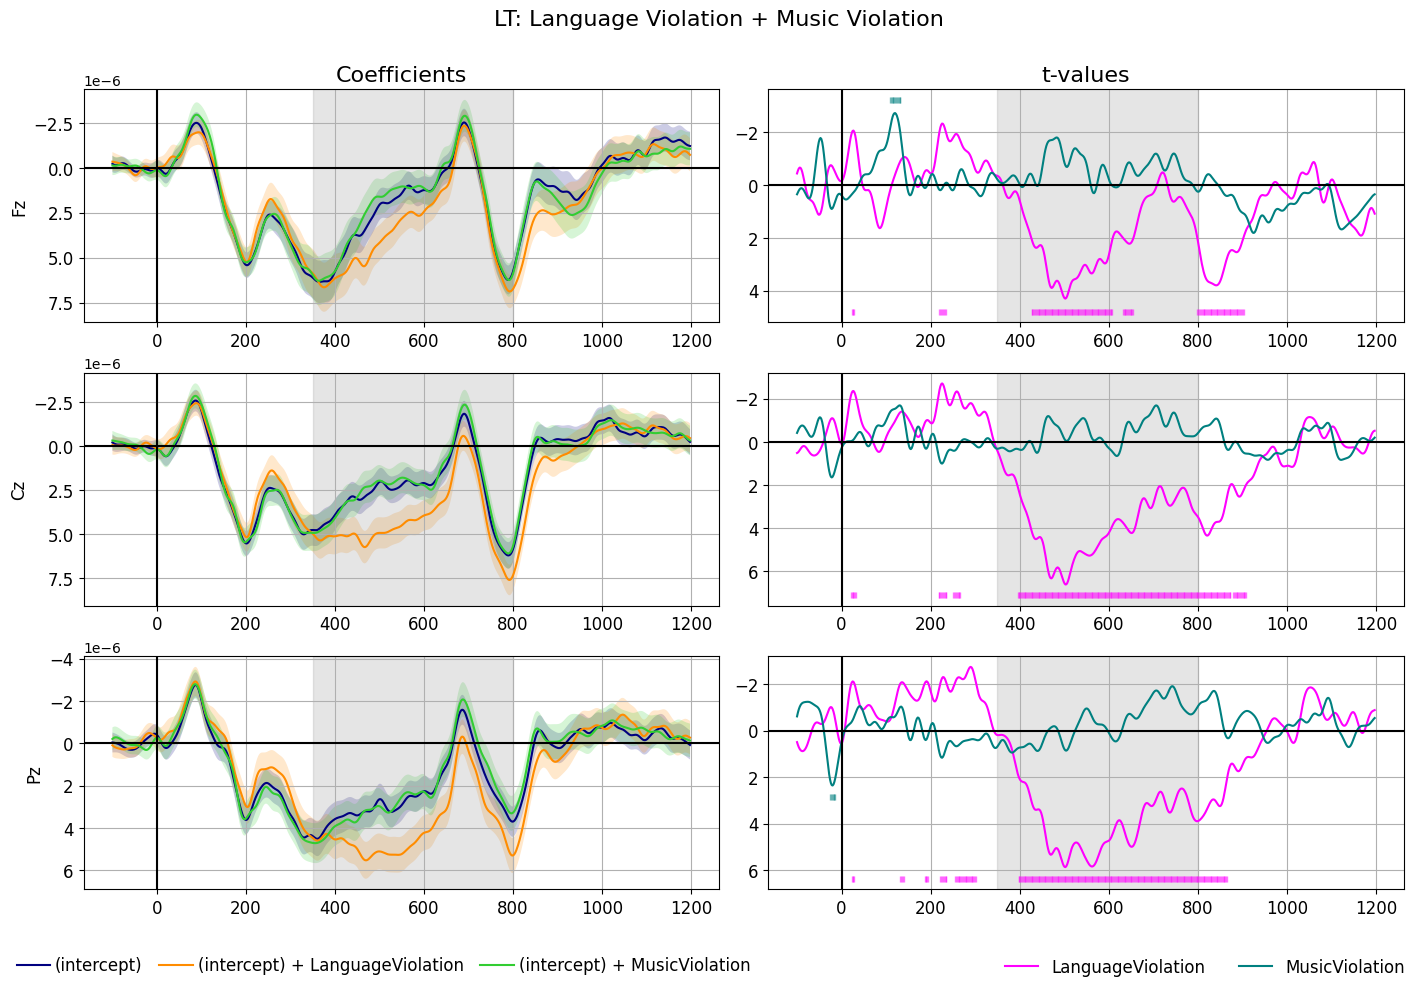

In [132]:
# colors1 = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
colors1 = ["navy", "darkorange", "limegreen"]
colors2 = ['magenta', 'teal']

# Create a figure with subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14, 10), sharex=True)

rerps.plots.plot_coefficients(models_summary, "Time", 'Fz',
                          title="Coefficients", legend=None, colors=colors1, hlt_tws=[(350, 800)], ax=ax1)

rerps.plots.plot_coefficients(models_summary, "Time", 'Cz',
                          title=None, legend=None, colors=colors1, hlt_tws=[(350, 800)], ax=ax3)

rerps.plots.plot_coefficients(models_summary, "Time", 'Pz',
                          title=None, legend=None, colors=colors1, hlt_tws=[(350, 800)], ax=ax5)


rerps.plots.plot_tvalues(models_summary, "Time", 'Fz',
                          title="t-values", legend=None, colors=colors2, hlt_tws=[(350, 800)], ax=ax2)

rerps.plots.plot_tvalues(models_summary, "Time", 'Cz',
                          title=None, legend=None, colors=colors2, hlt_tws=[(350, 800)], ax=ax4)

rerps.plots.plot_tvalues(models_summary, "Time", 'Pz',
                          title=None, legend=None, colors=colors2, hlt_tws=[(350, 800)], ax=ax6)


for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.invert_yaxis()

# Adjust spacing between subplots
plt.tight_layout()

ax1.set_ylabel( 'Fz', fontsize='large' )
ax3.set_ylabel( 'Cz', fontsize='large' )
ax5.set_ylabel( 'Pz', fontsize='large' )

# Add title
fig.suptitle('LT: Language Violation + Music Violation', fontsize=16)
plt.subplots_adjust(top=0.90)

handles, labels = ax1.get_legend_handles_labels()

# Collect handles and labels for legends
handles_left, labels_left = ax1.get_legend_handles_labels()
handles_right, labels_right = ax2.get_legend_handles_labels()

# Create legends
fig.legend(handles_left, labels_left, loc='lower left', ncol=4, fontsize='large', frameon=False, handletextpad=0.3, columnspacing=1.0, borderpad=0.5)
fig.legend(handles_right, labels_right, loc='lower right', ncol=4, fontsize='large', frameon=False)


# Adjust the layout
plt.subplots_adjust(bottom=0.10)

fig.savefig( 'finalPlots/coefs_tvals_lt.pdf', bbox_inches='tight' )